In [2]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')
dataset = load_dataset("swahili_news")
train_texts = dataset["train"]["text"]
train_labels = dataset["train"]["label"]
test_texts = dataset["test"]["text"]
test_labels = dataset["test"]["label"]
df = pd.DataFrame()
df["text"] = train_texts + test_texts
df["label"] = train_labels + test_labels
df["text"].iloc[np.random.choice(df.index, 100, replace=False)] = np.nan
df = df.sample(np.random.randint(24000, 24500))
df = df.reset_index(drop=True)
print("Your final dataset has have {} rows".format(df.shape[0]))
print("You have the following value counts for the label column:")
print(df["label"].value_counts())
df.head()

c:\Users\ALIENWARE M15\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset swahili_news (C:/Users/ALIENWARE M15/.cache/huggingface/datasets/swahili_news/swahili_news/0.2.0/ed5c9a13b97e0d2864ff1e34bfbd38b2f2c54fea77acffcaef187eb4f13cf8cc)
100%|██████████| 2/2 [00:00<00:00, 87.19it/s]


Your final dataset has have 24128 rows
You have the following value counts for the label column:
1    11000
2     6513
4     2380
3     1999
0     1407
5      829
Name: label, dtype: int64


,text,label
0,Mwandishi Wetu Tume ya Nguvu za Atomiki Tanzan...,1
1,TIMU ya Kagera Sugar na Mwadui FC leo Jumamos...,2
2,Mapenzi ni hisia yanayonogeshwa na furaha pamo...,4
3,"Akizungumza na waandishi wa habari, Rais wa T...",2
4,Majeruhi saba kati ya 32 walioungua moto baad...,1


In [3]:
df['text'] = df['text'].str.replace("\n", "")
df['text'] = df['text'].str.replace("\t", "")
df['text'] = df['text'].str.replace("-", "")
df['text'] = df['text'].str.replace(".", " . ")
df['text'] = df['text'].str.replace("\d+", "") 
df['text'] = df['text'].str.lower()
df.head(50)

,text,label
0,mwandishi wetu tume ya nguvu za atomiki tanzan...,1
1,timu ya kagera sugar na mwadui fc leo jumamos...,2
2,mapenzi ni hisia yanayonogeshwa na furaha pamo...,4
3,"akizungumza na waandishi wa habari, rais wa t...",2
4,majeruhi saba kati ya walioungua moto baada ...,1
5,na sheila katikula mwanza taasisi ya kuzuia n...,1
6,na mohamed kassara dar es salaam uongozi wa k...,2
7,na elizabeth hombodar es salaam balozi mteule...,1
8,bodi ya mikopo ya wanafunzi wa elimu ya juu (...,1
9,"zurich, uswisi baraza la umoja waulaya kuhusu ...",3


In [4]:
df.shape

(24128, 2)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text'].values.astype('U'))
tfidf = tfidf.transform(df['text'].values.astype('U'))
print(tfidf.shape)

(24128, 254847)


In [6]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = tts(tfidf, df['label'], test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, knn.pred)
print(cm_knn)

[[ 162  110    3    1    1    0]
 [ 183 1917   79   14    9   14]
 [   5   50 1233    3   24    0]
 [   5  139   28  226    8    0]
 [   9   79   62    3  281    1]
 [   4  122   11    1    1   38]]


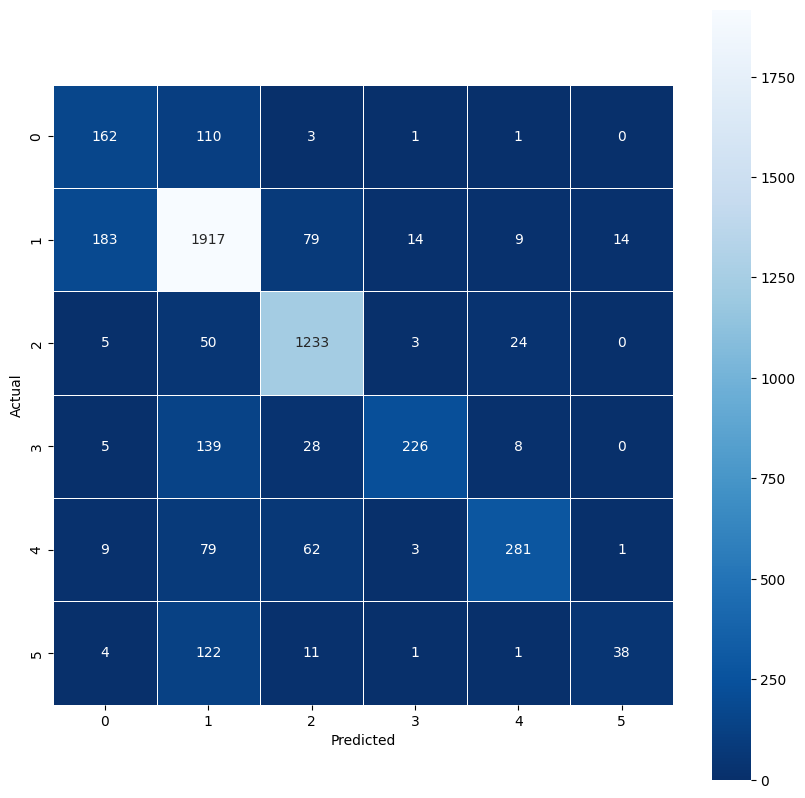

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 10))
sns.heatmap(cm_knn, annot = True, fmt = 'd', linewidths = 0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
def accuracy(cm):
    diagonal_sum = cm.trace()
    sum_of_all_elements = cm.sum()
    return diagonal_sum / sum_of_all_elements
    
print("Accuracy of the model is: ", accuracy(cm_knn))

Accuracy of the model is:  0.7992125984251969


In [12]:
def precision(cm):
    tpsum = 0
    for i in range(6):
        tpsum += cm[i][i]
    colsum = 0
    for i in range(6):
        colsum += cm[i][0]
    return (tpsum / colsum)/100

print("Precision of the model is: ", precision(cm_knn))

Precision of the model is:  0.10480978260869564


In [13]:
def recall(cm):
    tpsum = 0
    for i in range(6):
        tpsum += cm[i][i]
    rowsum = 0
    for i in range(6):
        rowsum += cm[0][i]
    return (tpsum / rowsum)/100

print("Recall of the model is: ", recall(cm_knn))

Recall of the model is:  0.1392418772563177


In [16]:
def f1_score(cm):
    return 2 * (precision(cm) * recall(cm)) / (precision(cm) + recall(cm))

print("F1 score of the model is: ", f1_score(cm_knn))

F1 score of the model is:  0.1195968992248062
